In [6]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import scipy.ndimage as ndi

In [7]:
train_dir = '/Users/sandundesilva/Documents/4th year/machine vision/cw final/backend/dataset/train'
validation_dir = '/Users/sandundesilva/Documents/4th year/machine vision/cw final/backend/dataset/test'
test_dir = '/Users/sandundesilva/Documents/4th year/machine vision/cw final/backend/dataset/test'

In [8]:
# Create ImageDataGenerators for loading and augmenting images during training
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
# Define image size and batch size
target_size = (224, 224)
batch_size = 32

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 3920 images belonging to 3 classes.


Python(5682) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [11]:
val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 341 images belonging to 3 classes.


In [12]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 341 images belonging to 3 classes.


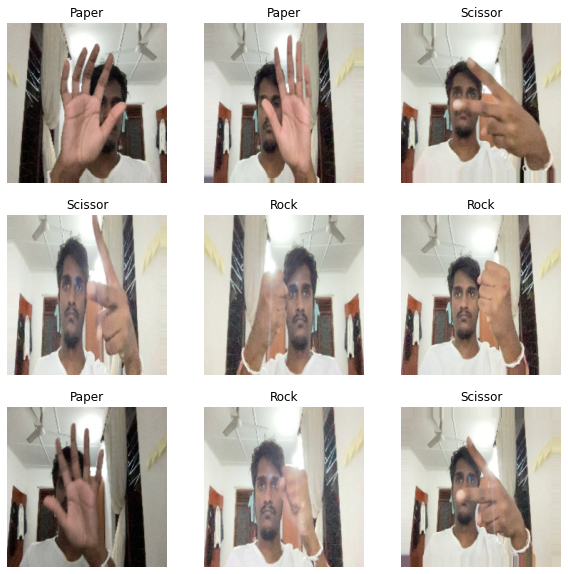

In [13]:
batch = train_generator.next()
images, labels = batch[0], batch[1]

label_names = ['Paper', 'Rock', 'Scissor']

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    
    label_index = np.argmax(labels[i])
    label = label_names[label_index]
    
    plt.title(label)
    plt.axis("off")
plt.show()


In [14]:
# Build the model
base_model = MobileNetV2(input_shape=(target_size[0], target_size[1], 3), include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Use early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [16]:
history = model.fit(train_generator, epochs=20, validation_data=val_generator, callbacks=[early_stop])

Epoch 1/20
123/123 [==============================] - 53s 411ms/step - loss: 0.5410 - accuracy: 0.7860 - val_loss: 0.2292 - val_accuracy: 0.9326
Epoch 2/20
123/123 [==============================] - 50s 402ms/step - loss: 0.3097 - accuracy: 0.8485 - val_loss: 0.1709 - val_accuracy: 0.9208
Epoch 3/20
123/123 [==============================] - 50s 404ms/step - loss: 0.2835 - accuracy: 0.8556 - val_loss: 0.1730 - val_accuracy: 0.9208
Epoch 4/20
123/123 [==============================] - 49s 400ms/step - loss: 0.2734 - accuracy: 0.8574 - val_loss: 0.1771 - val_accuracy: 0.9208
Epoch 5/20
123/123 [==============================] - 50s 407ms/step - loss: 0.2731 - accuracy: 0.8566 - val_loss: 0.1725 - val_accuracy: 0.9326


In [17]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy}')

11/11 [==============================] - 3s 288ms/step - loss: 0.1709 - accuracy: 0.9208
Test Accuracy: 0.9208211302757263


In [18]:
model.save('MobileNetV2_multi.h5')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


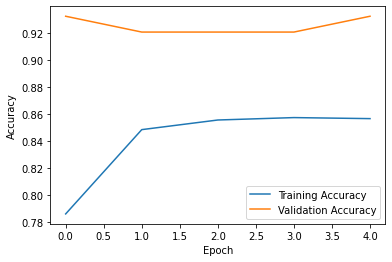

In [19]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(test_generator)

predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes

class_labels = list(test_generator.class_indices.keys())

print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


1/1 [==============================] - 1s 831ms/step
Predicted class label: Rock
Predicted class probability: 0.99773717


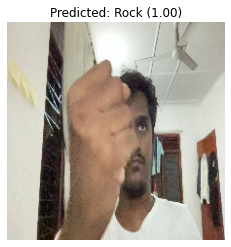

In [5]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

model = load_model('MobileNetV2_multi_Skin.h5')

target_size = (224, 224)

img_path = '/Users/sandundesilva/Documents/4th year/machine vision/cw final/backend/dataset/test/rock/test_81.jpg'
img = image.load_img(img_path, target_size=target_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

predictions = model.predict(img_array)

predicted_class_idx = np.argmax(predictions)
predicted_class_prob = predictions[0][predicted_class_idx]

label_names = ['Paper', 'Rock', 'Scissor']
predicted_label = label_names[predicted_class_idx]
print("Predicted class label:", predicted_label)
print("Predicted class probability:", predicted_class_prob)

plt.imshow(img)
plt.title(f'Predicted: {predicted_label} ({predicted_class_prob:.2f})')
plt.axis('off')
plt.show()
